<a href="https://colab.research.google.com/github/VU-CSP/popgrowth_assignment-WahoskiClaudia/blob/main/PopGrowthLecture_assignment_CCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population Growth Lecture Assignment
Claudia Wahoski


In [1]:
#import statements to import the packages and functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
#load custom functions from class example
if IN_COLAB and not os.path.exists("growth_fxns.py"):
    !wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/growth_fxns.py"
from growth_fxns import *

In [4]:
#Adjust seaborn settings
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [5]:
#load datatset
if IN_COLAB and not os.path.exists("MCF10A_trametinib.csv"):
    !wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/MCF10A_trametinib.csv"
dat = pd.read_csv("MCF10A_trametinib.csv") #data is in the object dat
dat.head() #first 5 rows of the data

,well,time,cell.count,uid,drug1,drug1.conc
0,A01,0.8,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,39,10ACh-28A_H03,trametinib,0.000004


# Assignment Task 1
Copy and execute a chunk of code from the line assigning values to d["pd"]. Describe what you did and the output

In [6]:
#look at The origianl dataframe
dat

,well,time,cell.count,uid,drug1,drug1.conc
0,A01,0.8,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,39,10ACh-28A_H03,trametinib,0.000004
...,...,...,...,...,...,...
295,A12,96.7,60,10ACh-28B_H03,trametinib,0.000004
296,A12,101.8,60,10ACh-28B_H03,trametinib,0.000004
297,A12,106.9,61,10ACh-28B_H03,trametinib,0.000004
298,A12,112.0,64,10ACh-28B_H03,trametinib,0.000004


In [7]:
#from the class notebook
dat.insert(2,"l2",np.empty_like(dat["cell.count"]))
dat.insert(3,"pd",np.empty_like(dat["cell.count"]))
dat["l2"] = np.round(np.log2(dat["cell.count"]),3)
dat["pd"] = flatten_matrix([np.round(dat[dat["well"]==w]["l2"] - dat[dat["well"]==w]["l2"].to_list()[0],3) for w in dat["well"].unique()]) #normalize based on the first timepoint of each well
#all the wells are in a single column, so the last line of code takes the of l2 values based on the first value in the series (series is all time points for the individual well) 
#so calculations are based on the first timepoint for a well
#inserting calculations for log2 and population doublings
#first two lines, add two empty columns with the same column of cell count
#numbers tell the position of the new column

In [8]:
#check the updated dataframe to see if the code above worked
dat

,well,time,l2,pd,cell.count,uid,drug1,drug1.conc
0,A01,0.8,5.000,0.000,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,4.644,-0.356,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,4.954,-0.046,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,5.728,0.728,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,5.285,0.285,39,10ACh-28A_H03,trametinib,0.000004
...,...,...,...,...,...,...,...,...
295,A12,96.7,5.907,0.778,60,10ACh-28B_H03,trametinib,0.000004
296,A12,101.8,5.907,0.778,60,10ACh-28B_H03,trametinib,0.000004
297,A12,106.9,5.931,0.802,61,10ACh-28B_H03,trametinib,0.000004
298,A12,112.0,6.000,0.871,64,10ACh-28B_H03,trametinib,0.000004


In [9]:
#chunk 1
dat["well"].unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12'], dtype=object)

The chunk of code above from the original code in the class notebook returns all of the unique values in the column "well" within the dataframe "dat". Inthis dataframe, there are 12 unique wells.

# Assignment Task 2
Generate a scatterplot for population doublings over time for the wells A04, A05, and A07. Describe the difference seen between the population doublings graph and the graph of the data in log2 scale

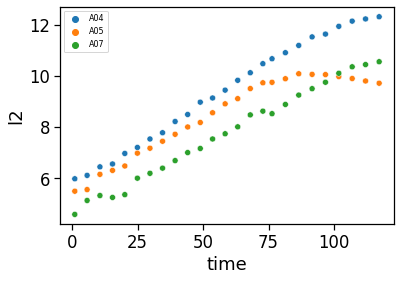

In [10]:
#code for log2 scatterplot
#look at 3 of the wells: A04, A05, and A07
# dtp = data to plot
dtp = dat[(dat["well"] == "A04") | (dat["well"] == "A05") | (dat["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="l2", hue="well")
plt.legend(loc='upper left', fontsize='8')

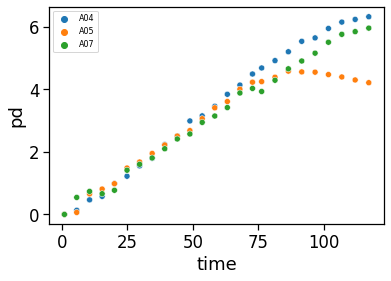

In [11]:
#add code for pd scatterplot

#look at 3 of the wells
# dtp = data to plot
dtp = dat[(dat["well"] == "A04") | (dat["well"] == "A05") | (dat["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="pd", hue="well")
plt.legend(loc='upper left', fontsize='8')

The population doublings graphs show that the three wells have similar population doubling trends from zero hours to around 75 hours. The log2 graph suggests that the A07 well begins with a smaller population of cells, but follows a similar trend in growth compared to well A04. The three lines are more spread out and different in the log2 graph whereas all the wells overlap in the beginning for the population doublings graph.
One similarity is that well A05 starts to stray from wells A04 and A07 after around 75 hours in both the log2 and population doublings graphs. 

# Assignment Task 3
Perform linear regression using the linregress function on the trametinib-treated wells. Describe how well the proliferation rates compare to the rates of the control wells.

In [12]:
from scipy.stats import linregress

In [13]:
## Starting with the trametinib-treated wells

# dtf = data to fit, only data in d with drug concentrations that is not equal to 0
#means thee wells were treated
dtf = dat[dat["drug1.conc"]!=0]
treated_wells = dtf["well"].unique()

In [14]:
res = [linregress(dtf[dtf["well"]==treated_wells[i]][["time","l2"]]) for i in np.arange(len(treated_wells))]
#each iterated item becomes an object in the list
#each object is the linear regression function applied to the data for that well, using only time and log2 columns 

In [15]:
#check
example_well = dtf["well"].unique()[1]
print(f"Example linregress output for well {example_well}")
res[1]

Example linregress output for well A12


LinregressResult(slope=0.0018027181675447268, intercept=5.804797993779366, rvalue=0.2947633020923504, pvalue=0.1526106083686435, stderr=0.001218577477198253, intercept_stderr=0.08275694027457718)

In [16]:
#slope values
prates = pd.Series(data=[np.round(r.slope,4) for r in res], index=treated_wells)
prates

A01    0.0013
A12    0.0018
dtype: float64

In [27]:
#check for goodness of fit
r2_vals = pd.Series(data=[np.round(r.rvalue**2,4) for r in res], index=treated_wells)
r2_vals

A01    0.0234
A12    0.0869
dtype: float64

In [28]:
#get the values one at a time
r2_vals[0] #corresponds to well A01

0.0234

In [29]:
#corresponds to well A12
r2_vals[1]

0.0869

In [18]:
## Compare to the control wells
# dtf = data to fit, only data in d with drug concentrations of 0
datf = dat[dat["drug1.conc"]==0]
ctrl_wells = datf["well"].unique()

In [19]:
datf

,well,time,l2,pd,cell.count,uid,drug1,drug1.conc
25,A02,1.0,5.755,0.000,54,10ACh-28B_B23,control,0.0
26,A02,5.7,6.044,0.289,66,10ACh-28B_B23,control,0.0
27,A02,10.6,6.285,0.530,78,10ACh-28B_B23,control,0.0
28,A02,15.4,6.409,0.654,85,10ACh-28B_B23,control,0.0
29,A02,20.1,6.755,1.000,108,10ACh-28B_B23,control,0.0
...,...,...,...,...,...,...,...,...
270,A11,96.7,10.929,5.374,1950,10ACh-28B_H02,control,0.0
271,A11,101.8,11.202,5.647,2356,10ACh-28B_H02,control,0.0
272,A11,106.9,11.384,5.829,2673,10ACh-28B_H02,control,0.0
273,A11,112.0,11.559,6.004,3017,10ACh-28B_H02,control,0.0


In [20]:
res_2 = [linregress(datf[datf["well"]==ctrl_wells[i]][["time","l2"]]) for i in np.arange(len(ctrl_wells))]
#each iterated item becomes an object in the list
#each object is the linear regression function applied to the data for that well, using only time and log2 columns 

In [21]:
np.arange(len(ctrl_wells)) #index

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
example_well_2 = datf["well"].unique()[2]
print(f"Example linregress output for well {example_well_2}")
res_2[2]

Example linregress output for well A04


LinregressResult(slope=0.05958479964994724, intercept=5.866617665251483, rvalue=0.99578848860991, pvalue=2.2407657805089508e-25, stderr=0.0011438806417812992, intercept_stderr=0.07768407321198084)

In [24]:
prates = pd.Series(data=[np.round(r.slope,4) for r in res_2], index=ctrl_wells)
prates

A02    0.0602
A03    0.0608
A04    0.0596
A05    0.0421
A06    0.0632
A07    0.0528
A08    0.0612
A09    0.0515
A10    0.0592
A11    0.0557
dtype: float64

In [25]:
r2_vals_cntrl = pd.Series(data=[np.round(r.rvalue**2,4) for r in res_2], index=ctrl_wells)
r2_vals_cntrl

A02    0.9940
A03    0.9982
A04    0.9916
A05    0.8989
A06    0.9976
A07    0.9948
A08    0.9951
A09    0.9906
A10    0.9963
A11    0.9961
dtype: float64

The r-squared values for the control wells are all above 0.99 (except for well A05), and this suggests the growth patterns follow a linear regression well. On the other hand, the r-sqaured values for the trametinib-treated wells are 0.0234 and 0.0869 for wells A01 and A12 respectively. The low r-squared values suggest that these treatments conditions lead to growth (or no growth) that does not follow a linear pattern. 